In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

import string
import random

## Create string
Create a random string of length 32, containing ASCII letters.

In [2]:
random.seed(0)

s = string.ascii_letters + string.digits
f = random.choices(s, k=32)
f = ''.join(f)

FLAG = 'CTF{%s}' % f
FLAG

'CTF{0UAqFzWsDK4FrUMp48Y3tT3QDgAL47D1}'

## Insert flag
Place the flag inside the image, and rotate because I felt like rotating it.  

Image is thresholded for binarization.

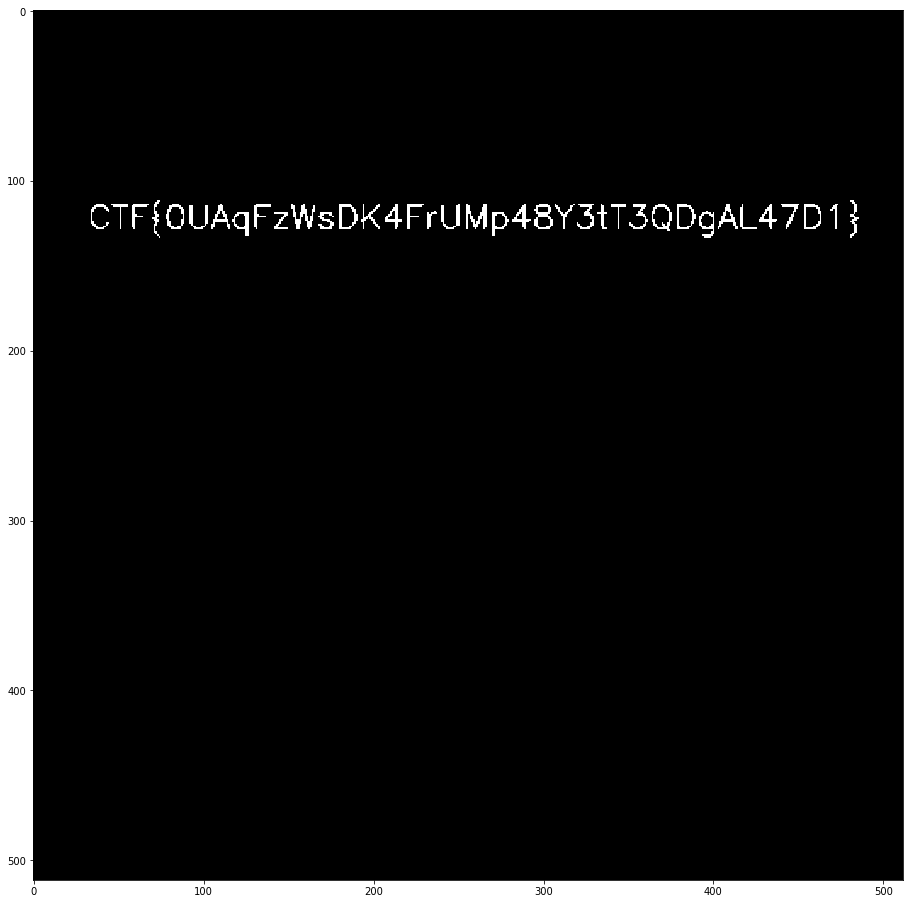

In [7]:
h, w = 512, 512
img = np.zeros([h, w], np.uint8)

font = cv2.FONT_HERSHEY_SIMPLEX
line = cv2.LINE_AA
x, y = 32, 128
cv2.putText(img, FLAG, (x, y), font, 0.65, (255, 255, 255), 1, line)

_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

plt.figure(figsize=(16, 16))
plt.imshow(thresh, cmap='gray');

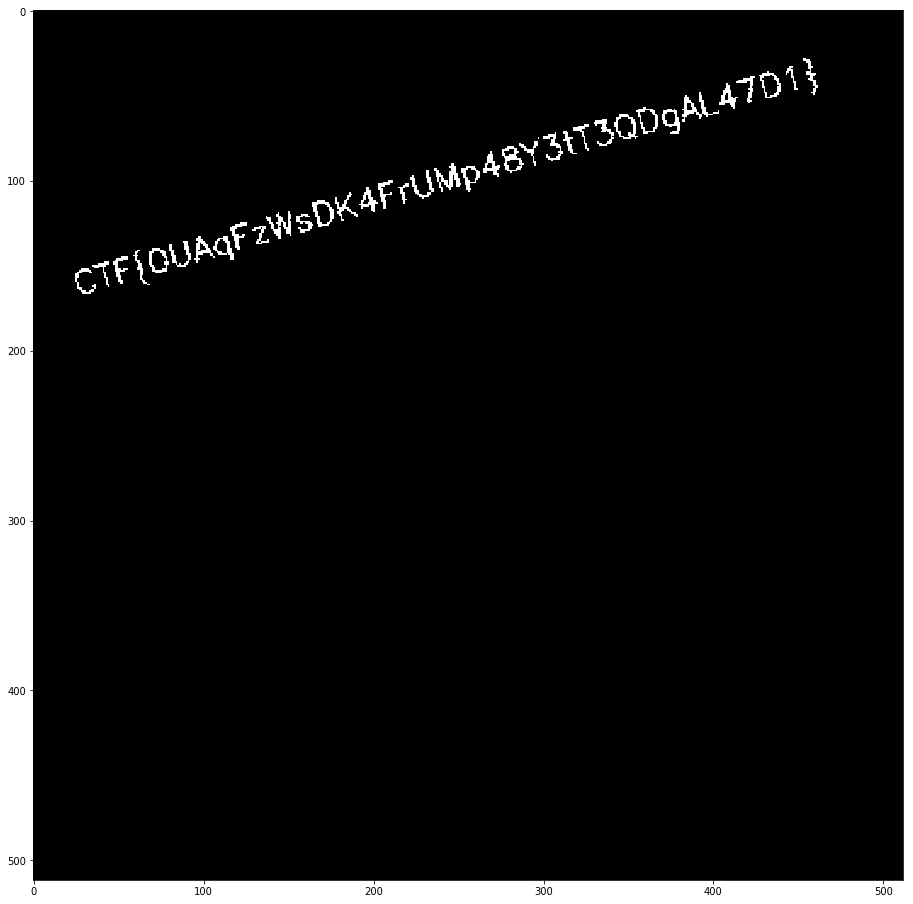

In [8]:
M = cv2.getRotationMatrix2D((w // 3, h // 3), 16, 1)
img = cv2.warpAffine(thresh, M, (w, h))

_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

plt.figure(figsize=(16, 16))
plt.imshow(thresh, cmap='gray');

## Get coordinates
Get the coordinates of all pixels. Randomly divide these pixels across three images.

In [13]:
coords = list(zip(*np.where(thresh)))

random.seed(0)
random.shuffle(coords)

coords_1 = coords[0::3]
coords_2 = coords[1::3]
coords_3 = coords[2::3]

len(coords_1), len(coords_2), len(coords_3)

(708, 708, 708)

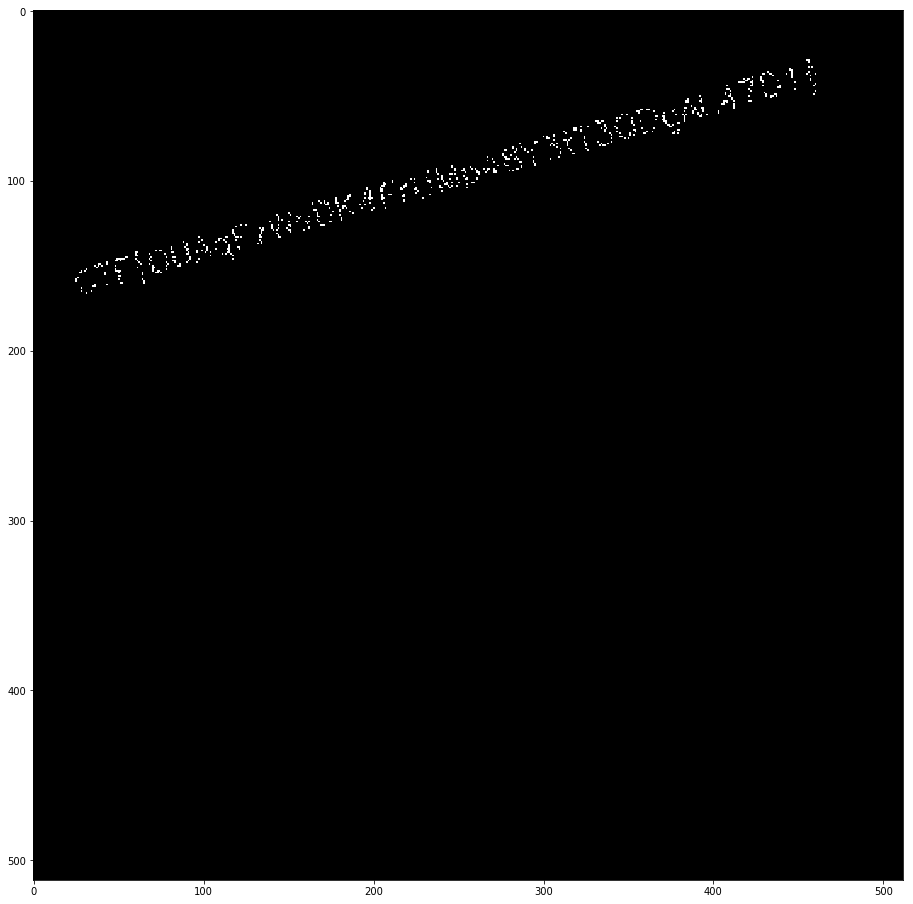

In [21]:
img_1 = np.zeros_like(img)
for y, x in coords_1:
    img_1[y, x] = 255
    
plt.figure(figsize=(16, 16))
plt.imshow(img_1, cmap='gray');

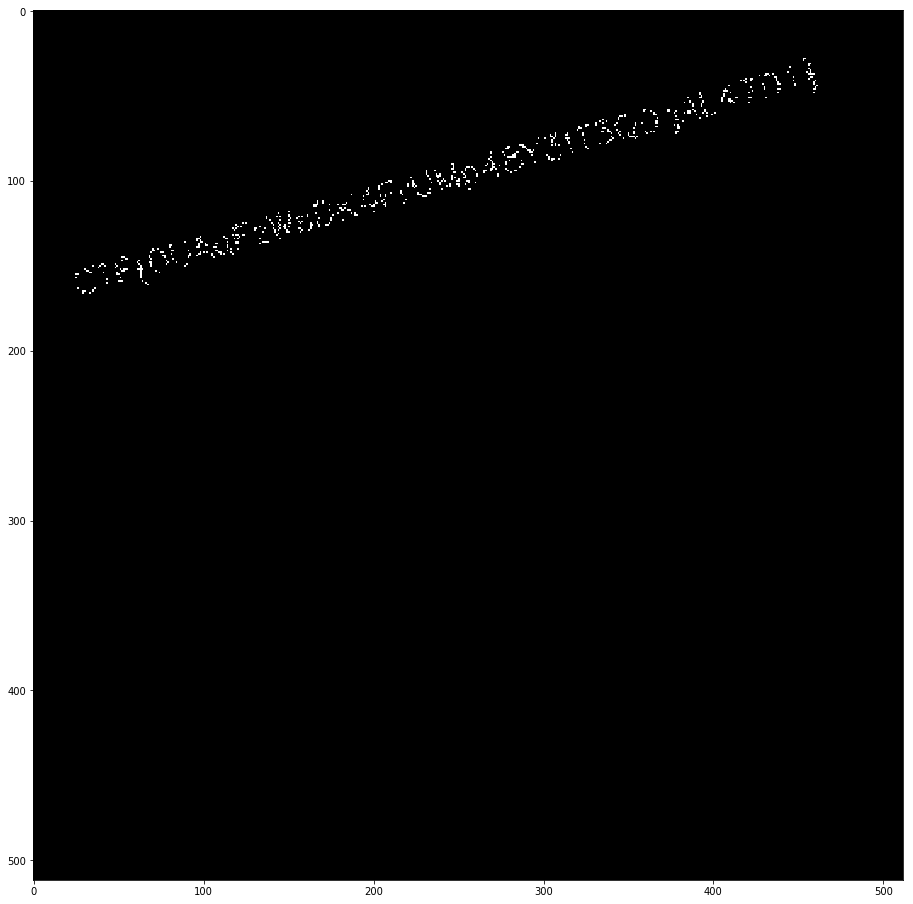

In [19]:
img_2 = np.zeros_like(img)
for y, x in coords_2:
    img_2[y, x] = 255
    
plt.figure(figsize=(16, 16))
plt.imshow(img_2, cmap='gray');

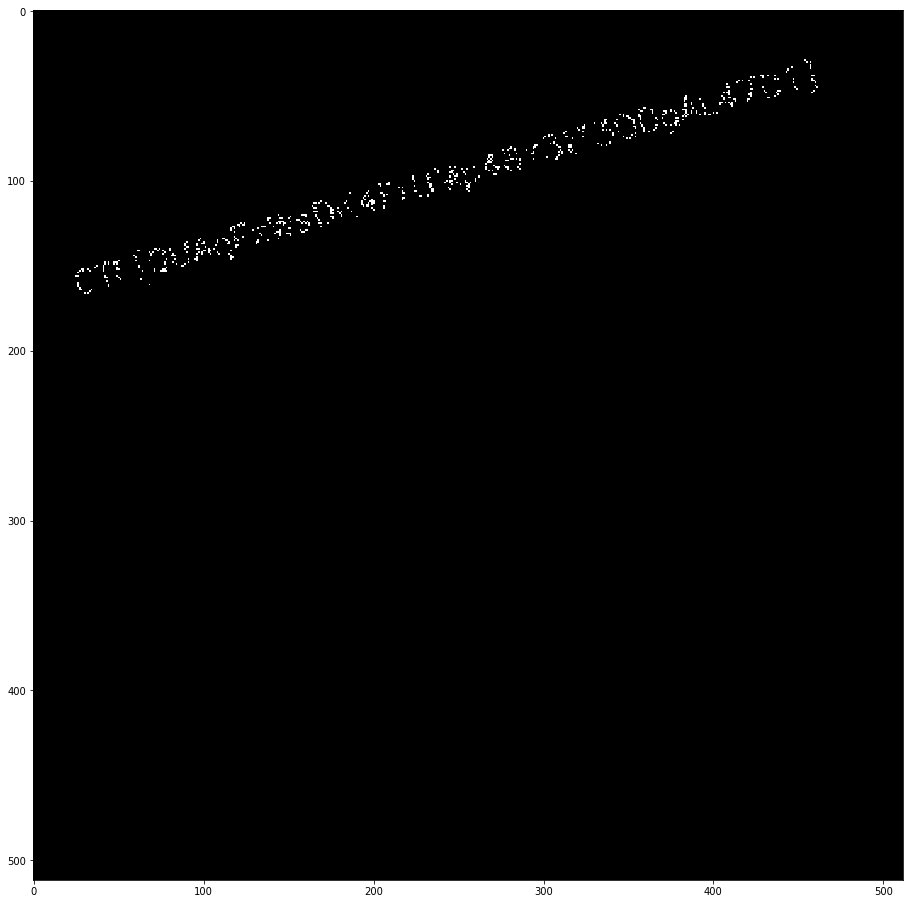

In [20]:
img_3 = np.zeros_like(img)
for y, x in coords_3:
    img_3[y, x] = 255
    
plt.figure(figsize=(16, 16))
plt.imshow(img_3, cmap='gray');

## Reconstruction
Reconstruct the image by taking their bitwise addition.

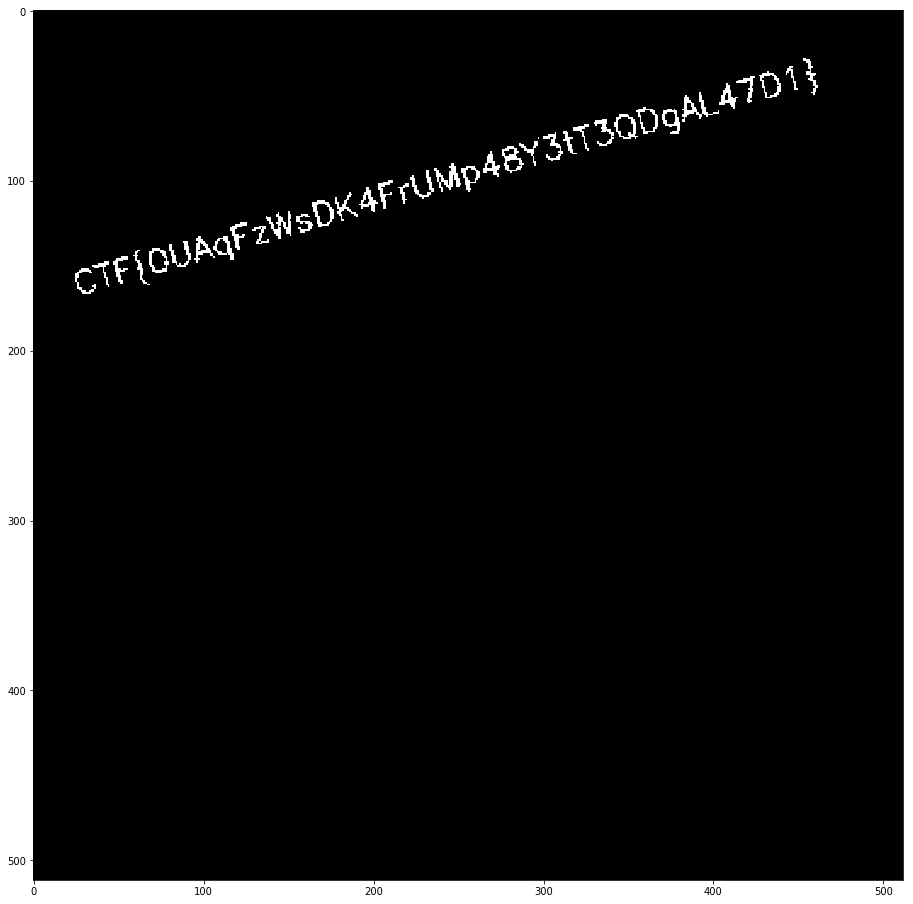

In [22]:
img_rec = img_1 | img_2 | img_3

plt.figure(figsize=(16, 16))
plt.imshow(img_rec, cmap='gray');